# Introduction

This project will investigate the correlation between geographical factors like latitude and population density with the spread in cases of COVID-19

The objective of this study is to prepare data, visualize it using plots in an effort to get a grasp of variables affecting the COVID-19 pandemic.

Some questions this study hopes to answer are:
- Have infection rates changed over the course of the pandemic?
- How do different state's infection rates compare?
- Is there a correlation between latitude and infection rates?
- Is there a correlation between average temperature and infection rates?
- Is there are correlation between Urban Density and infection rates? If so, how large is it?

Data Sources:
- [Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv)
- [Data.gov](https://catalog.data.gov/dataset/provisional-covid-19-death-counts-in-the-united-states-by-county)
- [covidtracking.com](https://covidtracking.com/data/download)

First, we import the necessary modules to read and visualize the data.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.misc import derivative
from scipy.stats import pearsonr

# Loading the Data

We'll be looking at three datasets in this project
1. A list of average temperatures in each State 
2. A list of COVID-19 cases in every county, measured by day
3. A list of COVID-19 deaths sorted by county and urban density

In [2]:
average_temperatures = pd.read_csv('Temperature_Data.csv')
US_cases_over_time = pd.read_csv('time_series_covid_19_confirmed_US.csv')
Provisional_Deaths = pd.read_csv('Provisional_COVID-19_Death_Counts_in_the_United_States_by_County.csv')
#group the cases by state and calculate averages for each date. Then, choose some states and make a linegraph with x-axis being the dates and y-axis being cases


In [3]:
print(average_temperatures.shape)
average_temperatures.head()

(50, 2)


,State,AverageTemperature
0,Alaska,26.6
1,Alabama,62.8
2,Arizona,60.3
3,Arkansas,60.4
4,California,59.4


In [4]:
print(US_cases_over_time.shape)
US_cases_over_time.head()

(3342, 505)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,7049,7106,7113,7118,7118,7126,7135,7141,7142,7142
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,21489,21511,21535,21546,21554,21578,21593,21606,21620,21620
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,2326,2327,2328,2328,2328,2331,2331,2333,2334,2334
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,2656,2657,2656,2658,2659,2660,2662,2666,2664,2664
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,6816,6826,6829,6832,6832,6847,6856,6862,6864,6864


In [67]:
print(Provisional_Deaths.shape)
Provisional_Deaths.head()

(3025, 11)


,Date as of,Start Date,End Date,State,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Footnote,Cov_Death_Percentage
0,10/06/2021,01/01/2020,10/02/2021,AK,Aleutians East Borough,2013,Noncore,NaN,14.0,One or more data cells have counts between 1-9...,NaN
1,10/06/2021,01/01/2020,10/02/2021,AK,Anchorage Municipality,2020,Medium metro,313.0,3968.0,NaN,0.078881
2,10/06/2021,01/01/2020,10/02/2021,AK,Bethel Census Area,2050,Noncore,17.0,184.0,NaN,0.092391
3,10/06/2021,01/01/2020,10/02/2021,AK,Denali Borough,2068,Noncore,NaN,11.0,One or more data cells have counts between 1-9...,NaN
4,10/06/2021,01/01/2020,10/02/2021,AK,Dillingham Census Area,2070,Noncore,NaN,43.0,One or more data cells have counts between 1-9...,NaN


# Exploring the Data

While the dataset with temperatures is easy enough to understand, we can see that the second table has a dizzying amount of data (3342 X 505)!. It measures COVID-19 cases in every county, every day from 1/22/20 to 5/29/21.

To get a better grasp of this data, let's group all counties within a state together, taking averages of COVID cases for each date.

In [5]:
Average_US_Cases_2 = US_cases_over_time.groupby('Province_State').mean()
Average_US_Cases = Average_US_Cases_2.drop(['UID', 'code3', 'FIPS','Lat', 'Long_'], axis = 1)
Average_US_Cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7843.913043,7850.333333,7854.028986,7856.869565,7858.782609,7863.217391,7867.115942,7872.130435,7875.434783,7875.434783
Alaska,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2116.212121,2118.242424,2118.242424,2118.242424,2121.181818,2122.787879,2124.818182,2126.121212,2127.515152,2127.515152
American Samoa,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arizona,0.0,0.0,0.0,0.0,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,51482.058824,51515.647059,51553.588235,51572.470588,51598.941176,51628.352941,51666.941176,51711.882353,51759.352941,51792.117647
Arkansas,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4411.194805,4413.805195,4416.103896,4417.363636,4418.000000,4422.272727,4424.649351,4427.480519,4430.259740,4432.337662


Now that we've condensed our data by state and removed some unneeded variables, let's use a line graph to see the data trends for each state. 

In [6]:
Cases_List = Average_US_Cases.values.tolist()
Dates_List = Average_US_Cases.columns.tolist()
States_List = Average_US_Cases.index.tolist()

Overall, we can see that all states had massive surges in COVID cases over the summer and holiday seasons. The shapes of the graphs are mostly logarithmic, following the classic 'S"-shaped curve of population growth. Infection rates spiked in the middle and slowly leveled off going into the summer of 2021.

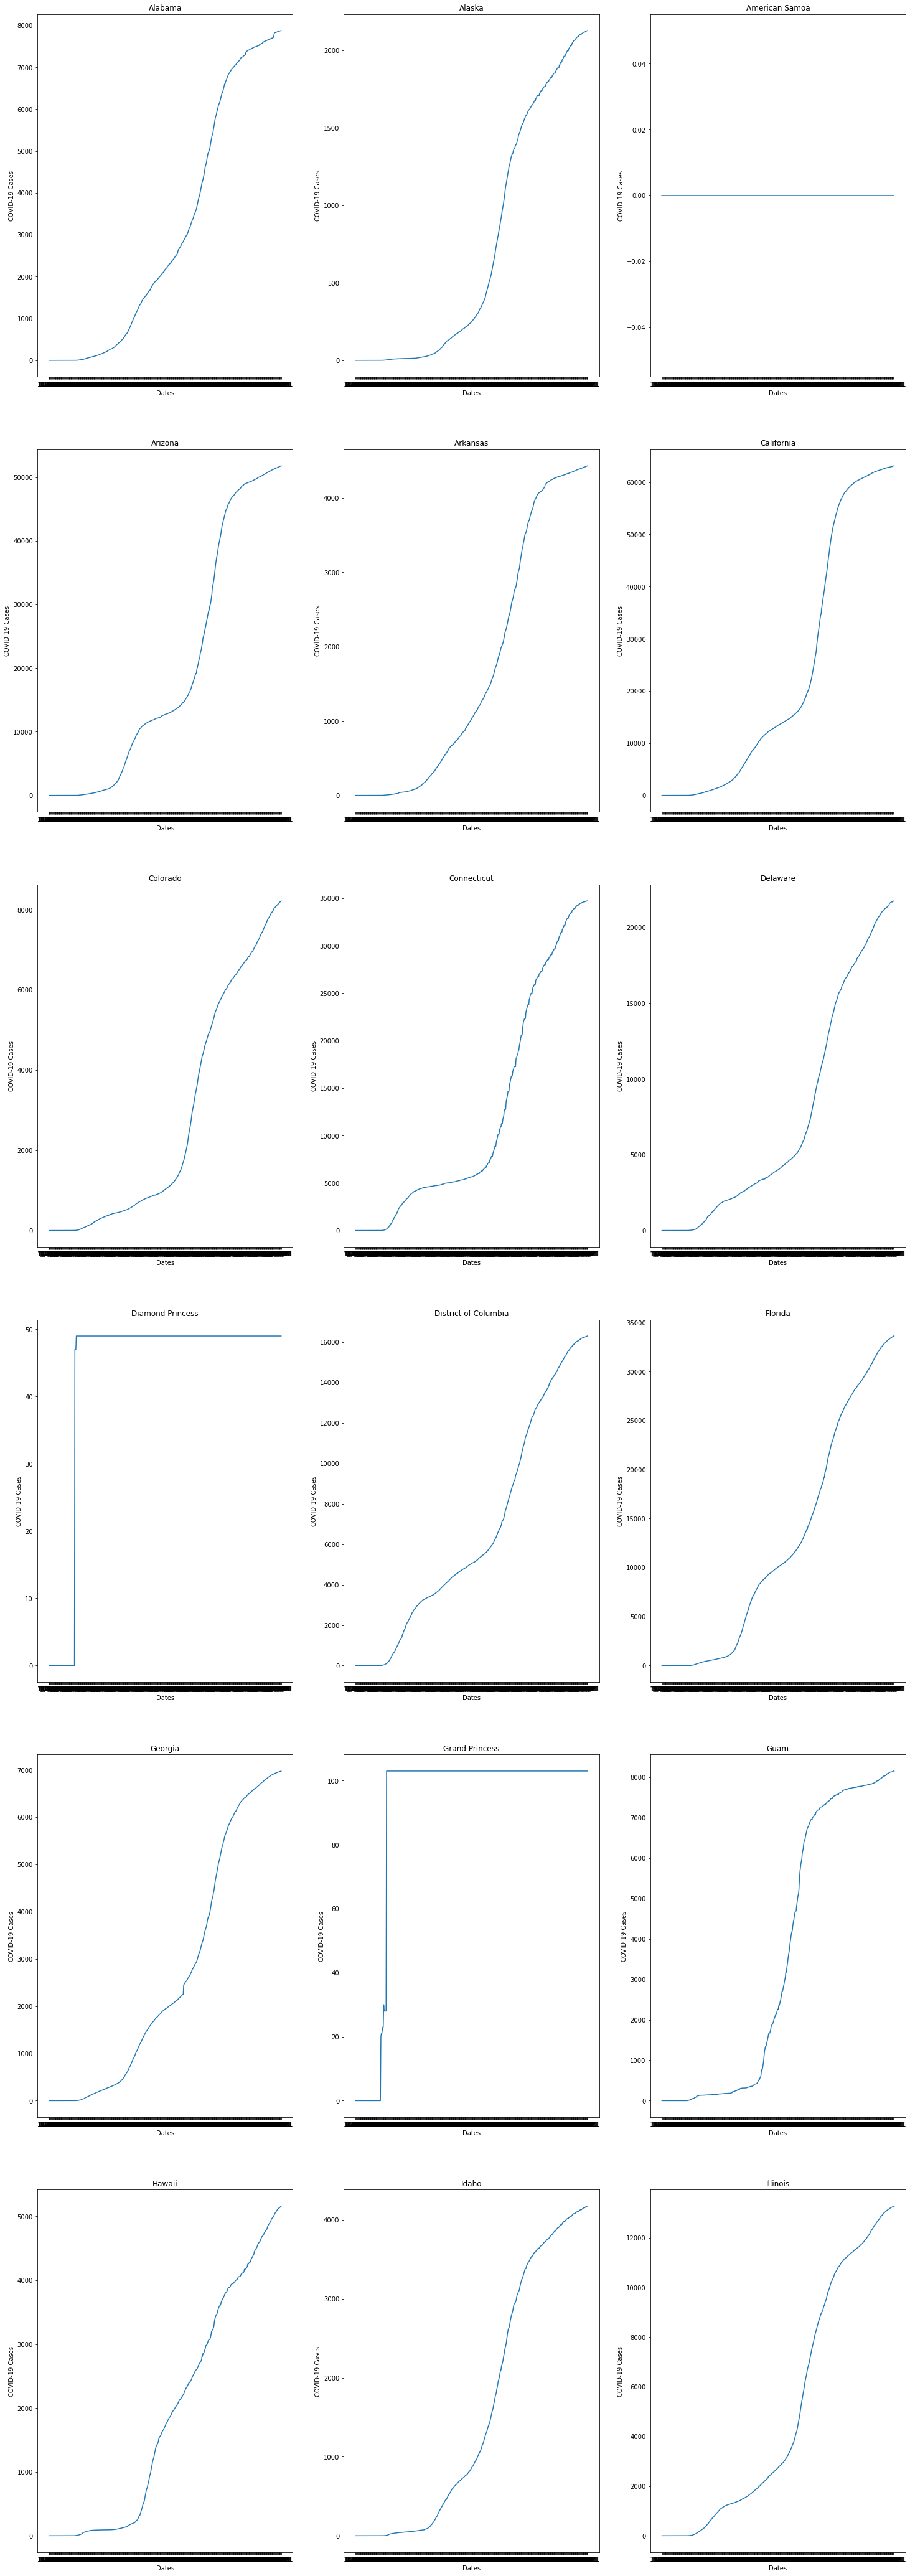

In [72]:
for i in range(18):
    
    plt.subplot(6,3,i+1)
    plt.plot(Dates_List, Cases_List[i])
    
    plt.title(States_List[i])
    plt.xlabel('Dates')
    plt.ylabel('COVID-19 Cases')    
    
plt.rcParams['figure.figsize'] = [25, 75]    
plt.show()

Looking at the first 14 states, we see some states (especially warmer ones) drastically jump up at the start of the summer months. Cooler States like Alaska and Colorado are slower in their growth. While it's great to get a qualitative look at the data using graphs, a quantitative measure would be a lot more concrete. Let's find the correlation between average temperatures and infection rates.

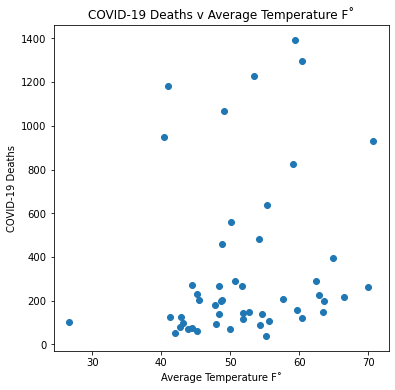

(0.18517348671657977, 0.1979466523481876)

In [17]:
state_average_death = Provisional_Deaths.groupby('State')['Deaths involving COVID-19'].mean().reset_index()
state_average_death.drop([7], inplace = True)
plt.scatter(x = average_temperatures.AverageTemperature, y = state_average_death['Deaths involving COVID-19'])
plt.title('COVID-19 Deaths v Average Temperature F˚')
plt.xlabel('Average Temperature F˚')
plt.ylabel('COVID-19 Deaths')
plt.rcParams['figure.figsize'] = [6, 6]   
correlation = pearsonr(average_temperatures.AverageTemperature, state_average_death['Deaths involving COVID-19'])
plt.show()

correlation

Hmmm. While we can visually see a slight positive correlation between higher temperatures and COVID Death Rates, it's not very strong. The Pearson Correlation Coefficient gives us a value of around 0.2, signifying a weak correlation. Let's try again but this time looking at COVID deaths as a percentage of total deaths.

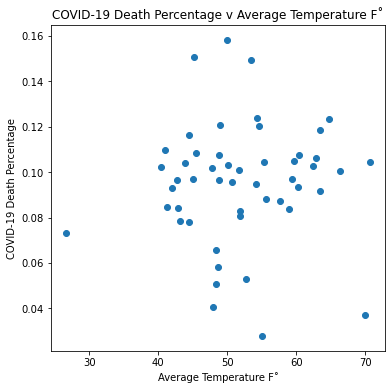

(0.03997381934492089, 0.7828410876916541)

In [16]:
function = lambda row: row['Deaths involving COVID-19']/row['Deaths from All Causes']
Provisional_Deaths['Cov_Death_Percentage'] = Provisional_Deaths.apply(function, axis = 1)
state_average_deathpercentage = Provisional_Deaths.groupby('State')['Cov_Death_Percentage'].mean().reset_index()
state_average_deathpercentage.drop([7], inplace = True)

plt.scatter(x = average_temperatures.AverageTemperature, y = state_average_deathpercentage['Cov_Death_Percentage'])
plt.title('COVID-19 Death Percentage v Average Temperature F˚')
plt.xlabel('Average Temperature F˚')
plt.ylabel('COVID-19 Death Percentage')
plt.rcParams['figure.figsize'] = [6, 6]   
correlation = pearsonr(average_temperatures.AverageTemperature, state_average_deathpercentage['Cov_Death_Percentage'])
plt.show()

correlation

If we calculate the **percentage** of COVID-19 deaths in relation to total deaths and plot that in relationship to temperature, we get an even weaker correlation of around 0.04. So far the effect of temperature on COVID-Spread doesn't seem too promising

Just to make sure we aren't missing anything,  let's take a look at Latitude vs COVID Death Rates.

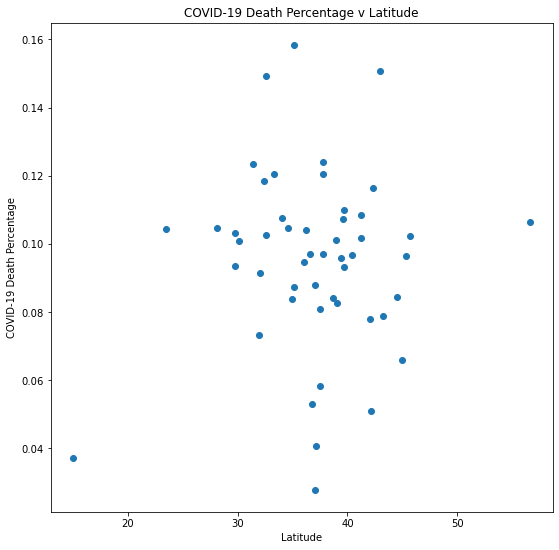

(0.05880868399646578, 0.6849822733328624)

In [46]:
Average_US_Cases_Lat = Average_US_Cases_2.drop(['UID', 'code3', 'FIPS', 'Long_'], axis = 1).reset_index()
Average_US_Cases_Lat.drop([2, 9, 13,14, 10, 39, 44, 52], inplace = True)
Average_US_Cases_Lat.reset_index()

plt.scatter(x = Average_US_Cases_Lat['Lat'], y = state_average_deathpercentage['Cov_Death_Percentage'])
plt.title('COVID-19 Death Percentage v Latitude')
plt.xlabel('Latitude')
plt.ylabel('COVID-19 Death Percentage')
plt.rcParams['figure.figsize'] = [9,9]
correlation2 = pearsonr(Average_US_Cases_Lat['Lat'], state_average_deathpercentage['Cov_Death_Percentage'])
plt.show()
correlation2

As expected, the correlation is a negligible 0.06. The weak correlations, while anti-climactic, do offer some valuable insights. While the [literature does show](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7793668/) that COVID-19's infection mechanism is inhibited by higher temperatures, it's effect is overshadowed by other confounding variables which make it hard to see a trend. What most likely explains the slight correlation we did see is human behavior. Warmer weather encourages people to leave the house and travel, contributing to the increase in virus exposure and spread. This is significant enough that [researchers](https://news.utexas.edu/2020/11/02/hot-or-cold-weather-alone-has-no-significant-effect-on-covid-19-spread/) from the University of Texas found that people taking time away from home is the leading contributor of COVID-19 spread, the next factor being Urban Density.



      Urban Rural Code  Deaths involving COVID-19
0  Large central metro                3426.235294
1   Large fringe metro                 459.784195
2         Medium metro                 457.562682
3         Micropolitan                  97.348511
4              Noncore                  31.073474
5          Small metro                 247.445161


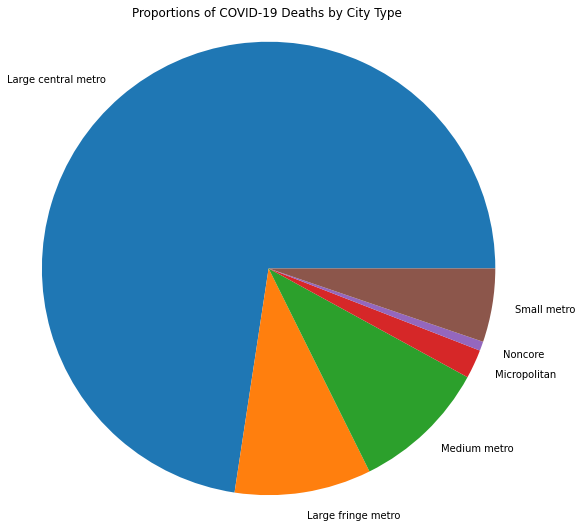

In [65]:
death_by_state_type = Provisional_Deaths.groupby(['Urban Rural Code'])['Deaths involving COVID-19'].mean().reset_index()
print(death_by_state_type)
Labels = death_by_state_type['Urban Rural Code'].values
wedgeSizes = death_by_state_type['Deaths involving COVID-19'].values

plt.pie(wedgeSizes, labels = Labels)
plt.axis('equal')
plt.title('Proportions of COVID-19 Deaths by City Type')
plt.show()

It's clear from the pie chart that a vast majority of deaths occured in cities and their suburbs. Looking below, the box plot shows us the distributions of COVID deaths. We can see how much higher the middle 50% is in Large Central Metro when compared to other city types.

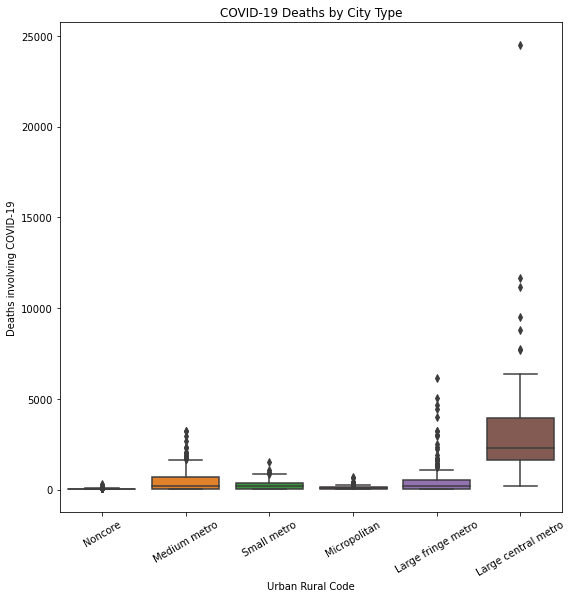

In [69]:
sns.boxplot(data = Provisional_Deaths, x = 'Urban Rural Code', y = 'Deaths involving COVID-19')
plt.title('COVID-19 Deaths by City Type')
plt.xticks(rotation = 30)
plt.show()

# Conclusions
This project was able to make quite a few meaningful data visualizations, even with the overwhelming amount of categories.

The project was also able to answer some of the questions posed in the beginning:

- Have Infection Rates changed over the past 3 months?
    - Yes, they were at an all-time high during the summer and holiday months of 2020. They leveled off coming into the summer of 2021
- How do different state's infection rates compare?
    - They are pretty similar, however warmer states do tend to show an increase in infection rate during the summer months 
- Is there a correlation between latitude and infection rates?
    - No.   
- Is there a correlation between average temperature and infection rates?
    - Very slightly, although many other factors probably confounded the correlation. A tertiary variable (human behavior) must be taken into account to fully see the effects of warmer weather on infection spread. 
- Is there are correlation between Urban Density and infection rates? If so, how large is it?
    - Yes. A vast majority of COVID related deaths are happening in denser populated areas.
